crypto API(Appilcation Program Interface) Automation Project

In [27]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '39b19f49-fab3-4f28-b718-d0107479ec08',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-10-05T10:49:46.224Z', 'error_code': 0, 'error_message': None, 'elapsed': 48, 'credit_count': 1, 'notice': None, 'total_count': 9847}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11755, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [29]:
import pandas as pd
df=pd.json_normalize(data['data'])

In [31]:
pd.set_option('display.max_columns',None)

In [33]:
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976332e+07,1.976332e+07,False,NaN,1,NaN,NaN,None,2024-10-05T10:48:00.000Z,62256.100081,2.579794e+10,-20.6073,-0.074083,1.491048,-5.348175,9.615681,13.076316,8.151958,1.230387e+12,57.6942,1.307378e+12,None,2024-10-05T10:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 16:34:54.971340
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203752e+08,1.203752e+08,True,NaN,2,NaN,NaN,None,2024-10-05T10:47:00.000Z,2422.805431,1.275329e+10,-20.7773,-0.158029,1.894613,-9.462528,1.167235,-1.344784,-19.527813,2.916458e+11,13.6756,2.916458e+11,None,2024-10-05T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 16:34:54.971340
2,825,Tether USDt,USDT,tether,99412,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196420e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-05T10:47:00.000Z,0.999853,4.599297e+10,-19.0932,-0.015166,0.004793,-0.016993,0.002120,-0.079770,-0.019102,1.196244e+11,5.6093,1.213548e+11,None,2024-10-05T10:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 16:34:54.971340
3,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.685980e+08,5.859808e+08,True,NaN,4,NaN,NaN,None,2024-10-05T10:47:00.000Z,144.231401,2.085142e+09,-18.8358,-0.413314,3.108860,-8.346738,8.732494,3.760224,3.414315,6.758654e+10,3.1692,8.451684e+10,None,2024-10-05T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 16:34:54.971340
4,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,8.897130e+07,8.897130e+07,False,NaN,5,NaN,NaN,None,2024-10-05T10:47:00.000Z,563.279943,1.546808e+09,-0.5612,-0.089870,2.000365,-6.326822,11.627933,17.852093,10.678155,5.011575e+10,2.3500,5.011575e+10,None,2024-10-05T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 16:34:54.971340
5,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.552336e+10,3.552336e+10,False,NaN,6,NaN,NaN,None,2024-10-05T10:47:00.000Z,0.999879,5.191145e+09,-15.0791,-0.013001,-0.002941,0.008246,-0.003205,-0.035445,-0.016707,3.551905e+10,1.6655,3.551905e+10,None,2024-10-05T10:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 16:34:54.971340
6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-10-05T10:48:00.000Z,0.532054,1.137172e+09,-26.2925,-0.354910,1.382815,-13.235404,-3.343599,6.300041,22.180372,3.009513e+10,1.4112,5.320542e+10,None,2024-10-05T10:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 16:34:54.971340
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462389e+11,1.462389e+11,True,NaN,8,NaN,NaN,None,2024-10-05T10:48:00.000Z,0.109471,5.878269e+08,-22.7566,-0.427107,1.520551,-11.347963,12.459312,13.843175,-0.822447,1.600893e+10,0.7507,1.600893e+10,None,2024-10-05T10:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 16:34:54.971340
8,11419,Toncoin,TON,toncoin,570,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.53

In [69]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '39b19f49-fab3-4f28-b718-d0107479ec08',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#Converting a data and recording the timestamp in the new column

    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\97798\Data\Day 21\API.csv'):
        df.to_csv(r'C:\Users\97798\Data\Day 21\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\97798\Data\Day 21\API.csv',mode='a',header=False)
        

In [71]:
# make it automation
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('successful')
    sleep(60)
exit()

successful
successful


KeyboardInterrupt: 

In [73]:
df2=pd.read_csv(r'C:\Users\97798\Data\Day 21\API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976334e+07,1.976334e+07,False,NaN,1,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,62179.394902,2.564380e+10,-20.5510,-0.074131,1.216044,-5.451254,9.651782,12.890645,8.291626,1.228873e+12,58.1028,1.305767e+12,NaN,2024-10-05T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:07:55.297254
1,1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203752e+08,1.203752e+08,True,NaN,2,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,2418.140965,1.275041e+10,-19.9320,-0.261614,1.544139,-9.585376,1.192494,-1.497017,-19.751240,2.910843e+11,13.7629,2.910843e+11,NaN,2024-10-05T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:07:55.297254
2,2,825,Tether USDt,USDT,tether,99412,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.196420e+11,1.213726e+11,True,NaN,3,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,0.999943,4.580691e+10,-18.7811,-0.012148,0.017247,-0.007682,0.014742,-0.044113,-0.005914,1.196352e+11,5.6565,1.213658e+11,NaN,2024-10-05T11:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 17:07:55.297254
3,3,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.685979e+08,5.859808e+08,True,NaN,4,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,143.808641,2.077756e+09,-18.0106,-0.461319,2.834056,-8.580438,8.770611,3.500778,3.135956,6.738843e+10,3.1877,8.426910e+10,NaN,2024-10-05T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:07:55.297254
4,4,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.552323e+10,3.552323e+10,False,NaN,5,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,0.999939,5.171554e+09,-14.7232,-0.017357,0.007345,0.009060,0.010520,-0.009986,-0.003167,3.552105e+10,1.6795,3.552105e+10,NaN,2024-10-05T11:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 17:07:55.297254
5,5,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,5.885999e+07,5.885999e+07,False,NaN,6,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,562.045654,1.541845e+09,-0.5223,-0.312540,1.581681,-6.675335,11.469641,17.615729,10.605568,3.308200e+10,1.5646,3.308200e+10,NaN,2024-10-05T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:07:55.297254
6,6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,0.531993,1.116458e+09,-26.5173,-0.217660,1.586601,-14.289090,-3.353043,6.568462,22.658667,3.009169e+10,1.4228,5.319934e+10,NaN,2024-10-05T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:07:55.297254
7,7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.462391e+11,1.462391e+11,True,NaN,8,NaN,NaN,NaN,2024-10-05T11:21:00.000Z,0.109418,5.832147e+08,-22.9111,-0.321252,1.454898,-11.879569,12.431714,14.248732,-0.626049,1.600117e+10,0.7569,1.600117e+10,NaN,2024-10-05T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:07:55.297254
8,8,11419,Toncoin,TON,toncoin,570,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd..

In [77]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19763343.00000,19763343.00000,False,NaN,1,NaN,NaN,None,2024-10-05T11:23:00.000Z,62180.69956,25616650521.62660,-20.59380,-0.08493,1.38594,-5.46721,9.58919,12.88399,8.29695,1228898493312.40479,58.14070,1305794690683.67993,None,2024-10-05T11:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:08:56.128038
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120375248.28639,120375248.28639,True,NaN,2,NaN,NaN,None,2024-10-05T11:22:00.000Z,2418.74296,12748961453.53972,-19.92680,-0.23684,1.61689,-9.54670,1.20785,-1.32328,-19.70128,291156784505.35455,13.77500,291156784505.34998,None,2024-10-05T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:08:56.128038
2,825,Tether USDt,USDT,tether,99412,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119641989887.49706,121372645826.72647,True,NaN,3,NaN,NaN,None,2024-10-05T11:22:00.000Z,1.00004,45800313996.65198,-18.78100,-0.04293,0.00858,-0.02018,0.02423,-0.04314,0.00517,119646746909.42914,5.66060,121377471660.35001,None,2024-10-05T11:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-05 17:08:56.128038
3,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468597902.30191,585980767.27027,True,NaN,4,NaN,NaN,None,2024-10-05T11:22:00.000Z,143.81725,2077763111.42365,-17.97290,-0.43601,2.82767,-8.56681,8.71606,3.52569,3.15012,67392463834.06588,3.18790,84274145214.33000,None,2024-10-05T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:08:56.128038
4,3408,USDC,USDC,usd-coin,22298,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35523231316.69019,35523231316.69019,False,NaN,5,NaN,NaN,None,2024-10-05T11:22:00.000Z,0.99995,5172507143.72231,-14.68630,-0.03254,-0.01077,-0.01539,0.00743,-0.01450,-0.00473,35521359161.01841,1.68060,35521359161.02000,None,2024-10-05T11:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-05 17:08:56.128038
5,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,58859989.98963,58859989.98963,False,NaN,6,NaN,NaN,None,2024-10-05T11:22:00.000Z,562.11258,1541845486.27200,-0.50800,-0.33646,1.62628,-6.61416,11.45025,17.64885,10.64065,33085940790.96602,1.56480,33085940790.97000,None,2024-10-05T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:08:56.128038
6,52,XRP,XRP,xrp,1400,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56564039920.00000,99987161962.00000,False,NaN,7,NaN,NaN,None,2024-10-05T11:23:00.000Z,0.53199,1115541211.74789,-26.51740,-0.19828,1.55938,-14.16866,-3.36852,6.31137,22.64807,30091658023.60658,1.42370,53199273011.91000,None,2024-10-05T11:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-05 17:08:56.128038
7,74,Dogecoin,DOGE,dogecoin,1076,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146239146383.70523,146239146383.70523,True,NaN,8,NaN,NaN,None,2024-10-05T11:23:00.000Z,0.10939,582511585.22590,-23.02560,-0.29257,1.39540,-11.82000,12.32549,14.17902,-0.64439,15996943490.01255,0.75670,15996943490.01000,None,2024-10-05T11:23:00.000Z,NaN

In [75]:
#Removing scientific notation
pd.set_option('display.float_format',lambda x:'%.5f' %x)

In [85]:
#Average Of Data
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_90d']].mean()

In [87]:
df4=df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h    -0.08493
              quote.USD.percent_change_24h    1.38594
              quote.USD.percent_change_7d    -5.46721
              quote.USD.percent_change_30d    9.58919
              quote.USD.percent_change_90d    8.29695
                                               ...   
Bitcoin Cash  quote.USD.percent_change_1h    -0.10275
              quote.USD.percent_change_24h    0.93243
              quote.USD.percent_change_7d    -8.06372
              quote.USD.percent_change_30d    4.77728
              quote.USD.percent_change_90d   -1.19254
Length: 75, dtype: float64

In [89]:
type(df3)


pandas.core.frame.DataFrame

In [91]:
type(df4)

pandas.core.series.Series

In [93]:
df5=df4.to_frame(name='values')
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h  -0.08493
             quote.USD.percent_change_24h  1.38594
             quote.USD.percent_change_7d  -5.46721
             quote.USD.percent_change_30d  9.58919
             quote.USD.percent_change_90d  8.29695
...                                            ...
Bitcoin Cash quote.USD.percent_change_1h  -0.10275
             quote.USD.percent_change_24h  0.93243
             quote.USD.percent_change_7d  -8.06372
             quote.USD.percent_change_30d  4.77728
             quote.USD.percent_change_90d -1.19254

[75 rows x 1 columns]

In [97]:
df5.count()

values    75
dtype: int64

In [107]:
index=pd.Index(range(75))
df6=df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08493
1,Bitcoin,quote.USD.percent_change_24h,1.38594
2,Bitcoin,quote.USD.percent_change_7d,-5.46721
3,Bitcoin,quote.USD.percent_change_30d,9.58919
4,Bitcoin,quote.USD.percent_change_90d,8.29695
...,...,...,...
70,Bitcoin Cash,quote.USD.percent_change_1h,-0.10275
71,Bitcoin Cash,quote.USD.percent_change_24h,0.93243
72,Bitcoin Cash,quote.USD.percent_change_7d,-8.06372
73,Bitcoin Cash,quote.USD.percent_change_30d,4.77728


In [143]:
#To rename the column
df7=df6.rename(columns={'level_1':'Percent'})
df7

,name,Percent,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08493
1,Bitcoin,quote.USD.percent_change_24h,1.38594
2,Bitcoin,quote.USD.percent_change_7d,-5.46721
3,Bitcoin,quote.USD.percent_change_30d,9.58919
4,Bitcoin,quote.USD.percent_change_90d,8.29695
...,...,...,...
70,Bitcoin Cash,quote.USD.percent_change_1h,-0.10275
71,Bitcoin Cash,quote.USD.percent_change_24h,0.93243
72,Bitcoin Cash,quote.USD.percent_change_7d,-8.06372
73,Bitcoin Cash,quote.USD.percent_change_30d,4.77728


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

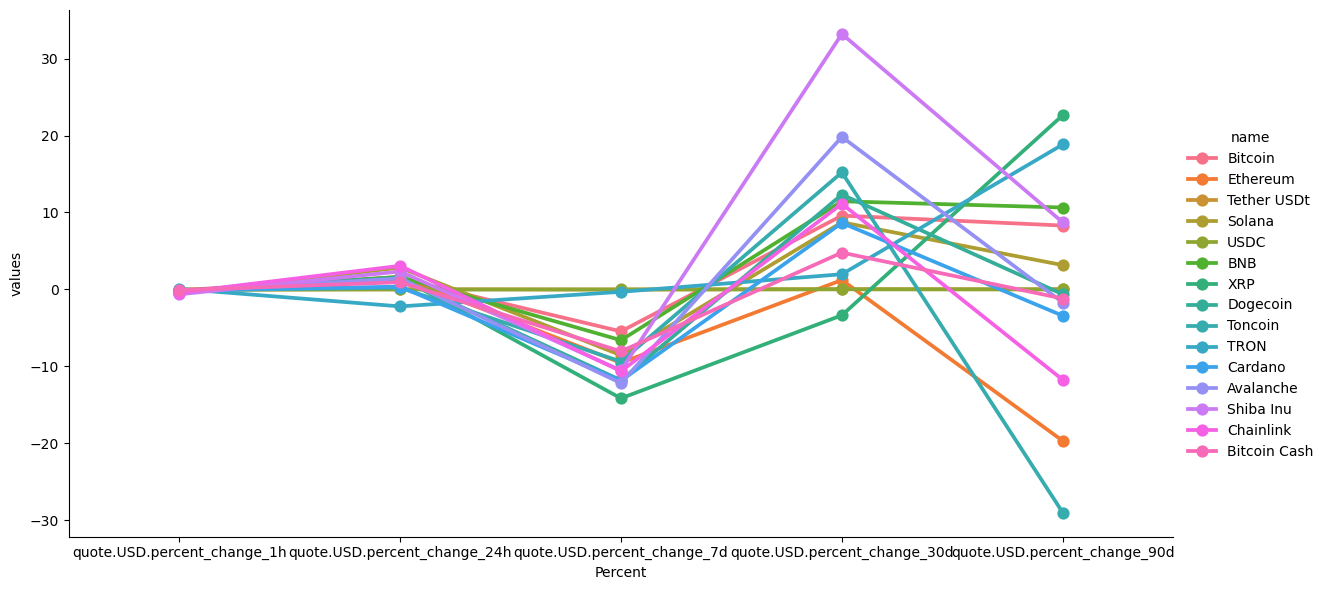

In [157]:
sns.catplot(x='Percent',y='values',hue='name',data=df7, height=6,kind='point', aspect=2 )

In [ ]:
#To replace the value
# df7['Percent'].repalce(['quote.USD.percent_change_1h'],['1h'])

In [171]:
df8=df2[['name','quote.USD.price','timestamp']]
df8=df8.query("name=='Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,62179.39490,2024-10-05 17:07:55.297254
15,Bitcoin,62180.69956,2024-10-05 17:08:56.128038


Text(0.5, 1.0, 'Bitcoin')

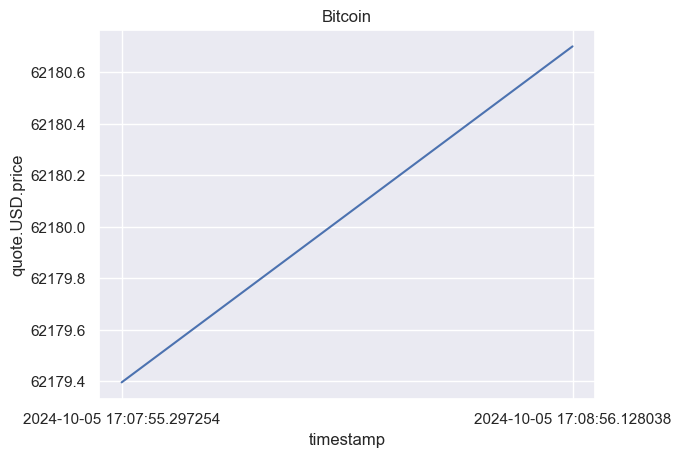

In [181]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df8)
plt.title('Bitcoin')